
# 📈 Caso 4 – Optimización de función: $f(x) = \sin(x) + 
rac{x}{10}$

## Contexto:
Esta función combina una oscilación con un crecimiento lineal, generando múltiples máximos locales. Es ideal para evaluar cómo se comportan algoritmos como **Hill Climbing** (sensible a óptimos locales) frente a **A\*** (guiado por heurística).

### Rango de valores: \(x \in [0, 20]\)


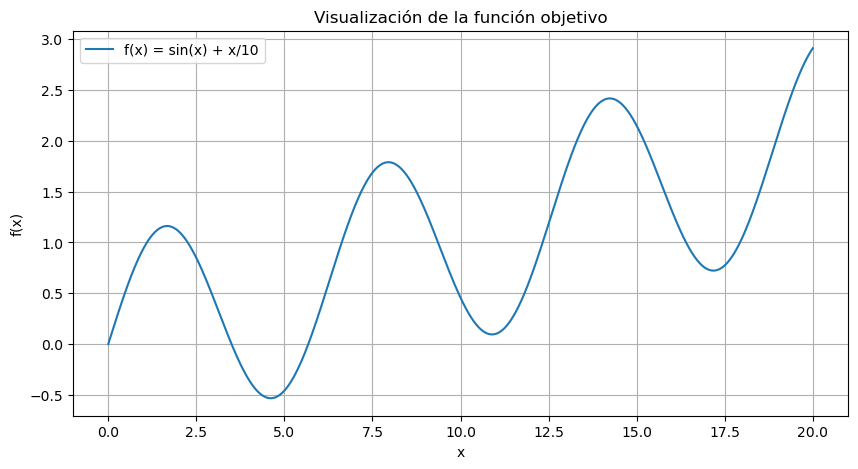

In [1]:

import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.sin(x) + x / 10

x_vals = np.linspace(0, 20, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(10,5))
plt.plot(x_vals, y_vals, label='f(x) = sin(x) + x/10')
plt.title('Visualización de la función objetivo')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


In [2]:

def hill_climbing(start=0, step=0.1, max_steps=200):
    x = start
    path = [x]
    for _ in range(max_steps):
        neighbors = [x + step, x - step]
        neighbors = [n for n in neighbors if 0 <= n <= 20]
        best = max(neighbors, key=f)
        if f(best) > f(x):
            x = best
            path.append(x)
        else:
            break
    return path

path_hill = hill_climbing()
print("Camino (Hill Climbing):", path_hill)
print("Valor final:", f(path_hill[-1]))


Camino (Hill Climbing): [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004]
Valor final: 1.1616648104524687


In [3]:

from heapq import heappush, heappop

def heuristic(x):
    return np.cos(x) / 10  # simple estimación basada en derivada de sin(x)

def a_star(start=0, step=0.1, max_steps=200):
    open_list = []
    heappush(open_list, (-(f(start) + heuristic(start)), start, [start]))
    visited = set()

    while open_list:
        _, current, path = heappop(open_list)
        if current in visited:
            continue
        visited.add(current)
        if len(path) > max_steps:
            break
        for neighbor in [current + step, current - step]:
            if 0 <= neighbor <= 20 and neighbor not in visited:
                new_path = path + [neighbor]
                heappush(open_list, (-(f(neighbor) + heuristic(neighbor)), neighbor, new_path))
    return path

path_astar = a_star()
print("Camino (A*):", path_astar)
print("Valor final:", f(path_astar[-1]))


Camino (A*): [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000007, 2.400000000000001, 2.500000000000001, 2.600000000000001, 2.700000000000001, 2.800000000000001, 2.9000000000000012, 3.0000000000000013, 3.1000000000000014, 3.2000000000000015, 3.3000000000000016, 3.4000000000000017, 3.5000000000000018, 3.600000000000002, 3.700000000000002, 3.800000000000002, 3.900000000000002, 4.000000000000002, 4.100000000000001, 4.200000000000001, 4.300000000000001, 4.4, 4.5, 4.6, 4.699999999999999, 4.799999999999999, 4.899999999999999, 4.999999999999998, 5.099999999999998, 5.1999999999999975, 5.299999999999997, 5.399999999999997, 5.4999999999999964, 5.599999999999996, 5.699999999999996, 5.799999999999995, 5.89999999

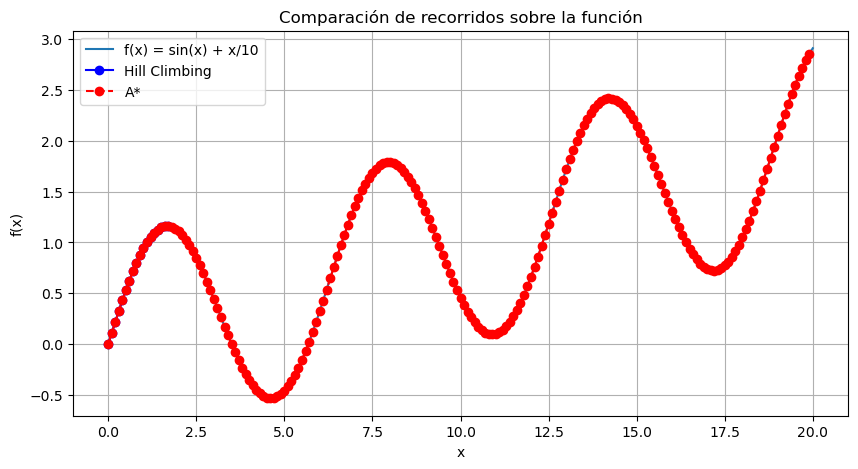

In [4]:

plt.figure(figsize=(10,5))
plt.plot(x_vals, y_vals, label='f(x) = sin(x) + x/10')
plt.plot(path_hill, [f(x) for x in path_hill], 'bo-', label='Hill Climbing')
plt.plot(path_astar, [f(x) for x in path_astar], 'ro--', label='A*')
plt.title('Comparación de recorridos sobre la función')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()



## ✅ Conclusión

- **Hill Climbing** tiende a quedarse en el primer máximo local que encuentra.
- **A\*** tiene un comportamiento más flexible si se implementa una buena heurística.
- En funciones con oscilaciones múltiples, A\* puede ser más efectivo para encontrar mejores soluciones globales.
